In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
# Load Cleaned Data
df = pd.read_csv("data/processed/train_clean.csv")

features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
    "sqft_living15", "sqft_lot15",
    "grade", "condition", "view", "waterfront",
    "lat", "long"
]

X = df[features]
y = df["log_price"]


In [9]:
# Train–Validation Split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

preds_lr = lr.predict(X_val)
# rmse_lr = mean_squared_error(y_val, preds_lr, squared=False)
# rmse_lr
mse_lr = mean_squared_error(y_val, preds_lr)
rmse_lr = np.sqrt(mse_lr)
rmse_lr

0.261496464929802

In [11]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
preds_rf = rf.predict(X_val)
# rmse_rf = mean_squared_error(y_val, preds_rf, squared=False)
mse_rf = mean_squared_error(y_val, preds_rf)
rmse_rf = np.sqrt(mse_rf)
rmse_rf


0.1774516813628879

In [ ]:
# XGBoost
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
preds_xgb = xgb.predict(X_val)
# rmse_xgb = mean_squared_error(y_val, preds_xgb, squared=False)
mse_xgb = mean_squared_error(y_val, preds_xgb)
rmse_xgb = np.sqrt(mse_xgb)
rmse_xgb

0.1666990417473813

In [13]:
# Compare Baselines
pd.DataFrame({
    "Model": ["Linear", "Random Forest", "XGBoost"],
    "RMSE": [rmse_lr, rmse_rf, rmse_xgb]
})

,Model,RMSE
0,Linear,0.261496
1,Random Forest,0.177452
2,XGBoost,0.166699


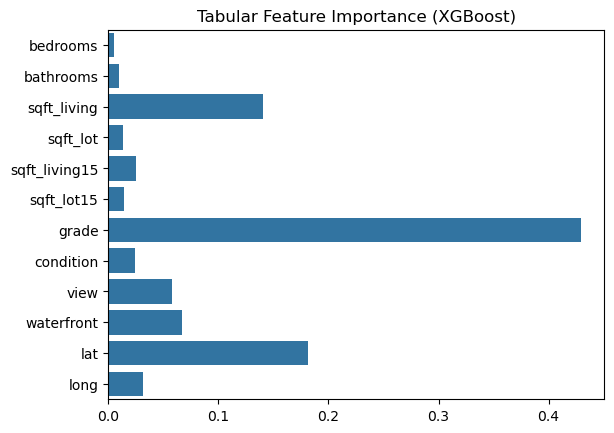

In [14]:
# Feature Importance
importances = xgb.feature_importances_

sns.barplot(x=importances, y=features)
plt.title("Tabular Feature Importance (XGBoost)")
plt.show()

In [16]:
# Save Best Tabular Model
import joblib
joblib.dump(xgb, "models/tabular_xgb.pkl")


['models/tabular_xgb.pkl']